In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
file3 = "../output/bc_hashes.csv"
df3 = pd.read_csv(file3,sep=",")

In [4]:
df3 = df3[df3["metric"]=="BF"]
df_box3 = df3[["num diffs","coverage","k-length","score","hash"]]
df_box3["num diffs"] = df_box3["num diffs"]/2000000
df_box3["score"] = 1-df_box3["score"]

/tmp/ipykernel_659734/4023733078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box3["num diffs"] = df_box3["num diffs"]/2000000
/tmp/ipykernel_659734/4023733078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box3["score"] = 1-df_box3["score"]


In [5]:
df_box3

,num diffs,coverage,k-length,score,hash
1,0.000619,10,10,0.012381,5
2,0.000619,10,10,0.011585,6
3,0.000619,10,10,0.010885,7
5,0.000495,10,20,0.037792,5
6,0.000495,10,20,0.033817,6
...,...,...,...,...,...
2758,0.003958,40,30,0.043007,6
2759,0.003958,40,30,0.038804,7
2761,0.000300,40,40,0.103385,5
2762,0.000300,40,40,0.092050,6


In [6]:
# df_box3 = pd.DataFrame(df, columns=["num diffs","coverage","score","k-length"])
# df_box3.boxplot(by=["coverage","k-length"])
df_box3.groupby(["coverage","k-length","hash"])

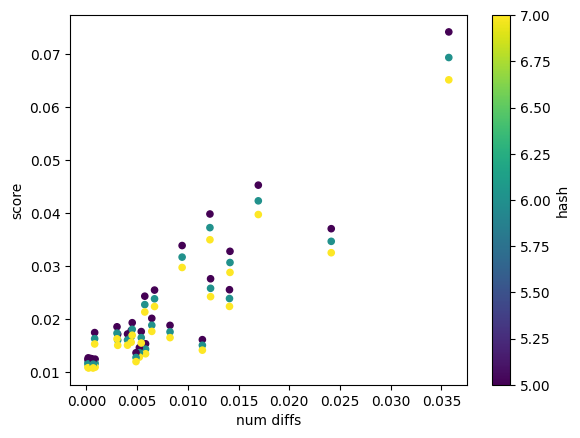

In [7]:
cov_10 = df_box3[df_box3["k-length"]==10]
cov_10 = cov_10[cov_10["coverage"]==10]
# cov_10
fig, ax = plt.subplots()
cov_10.plot.scatter(y="score",x="num diffs",c="hash",colormap='viridis',ax=ax,legend=False)

k_lengths = [5,6,7]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_10[cov_10["hash"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    # reg = LinearRegression().fit(X, y)
    # sub_df['hash:' + str(k_lengths[i])] = reg.predict(X)

    # print("Coeff: " + str(k_lengths[i]))
    # print(reg.coef_)

    # sub_df.plot.line(y='hash:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

# plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_659734/3529094218.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_659734/3529094218.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_659734/3529094218.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Coeff: 10
[0.94647608]
Coeff: 20
[3.87087434]
Coeff: 30
[5.47362753]
Coeff: 40
[5.18503204]


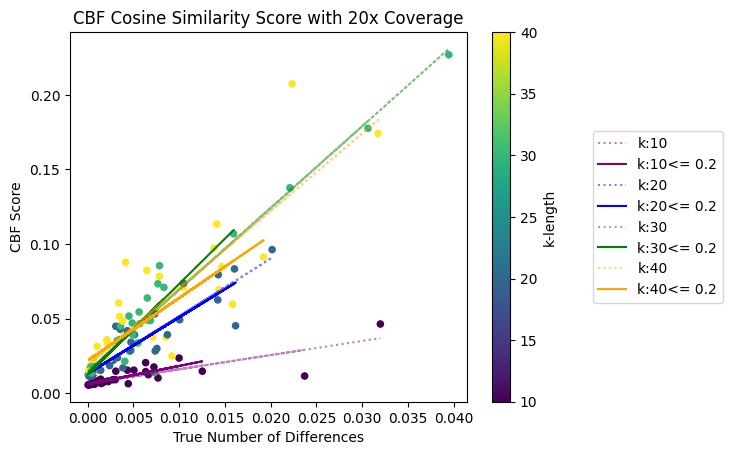

In [8]:
cov_20 = df_box3[df_box3["coverage"]==20]
cov_20 = cov_20[cov_20["hash"]==6]

# cov_20
fig, ax = plt.subplots()
cov_20.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_20[cov_20["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.title("CBF Cosine Similarity Score with 20x Coverage")
ax.set_ylabel("CBF Score")
ax.set_xlabel("True Number of Differences")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_659734/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_659734/2217191788.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_659734/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Coeff: 10
[1.22944102]
Coeff: 20
[3.30452296]
Coeff: 30
[3.25193358]
Coeff: 40
[6.76471589]


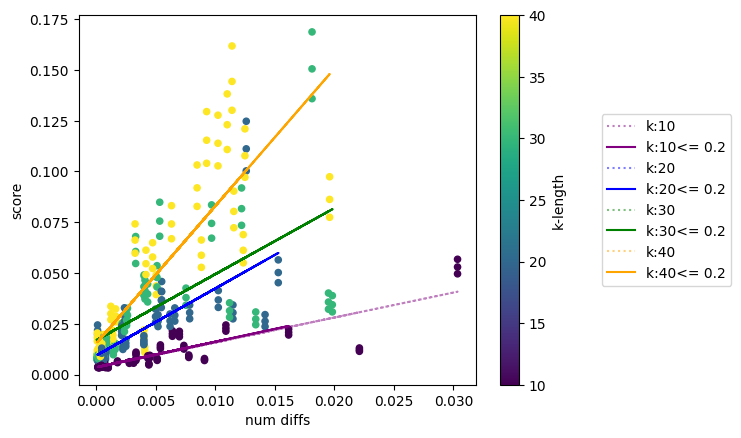

In [9]:
cov_30 = df_box3[df_box3["coverage"]==30]
# cov_10
fig, ax = plt.subplots()
cov_30.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_30[cov_30["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_659734/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_659734/1260264352.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_659734/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Coeff: 10
[0.78574774]
Coeff: 20
[4.32872094]
Coeff: 30
[5.51007786]
Coeff: 40
[5.01830814]


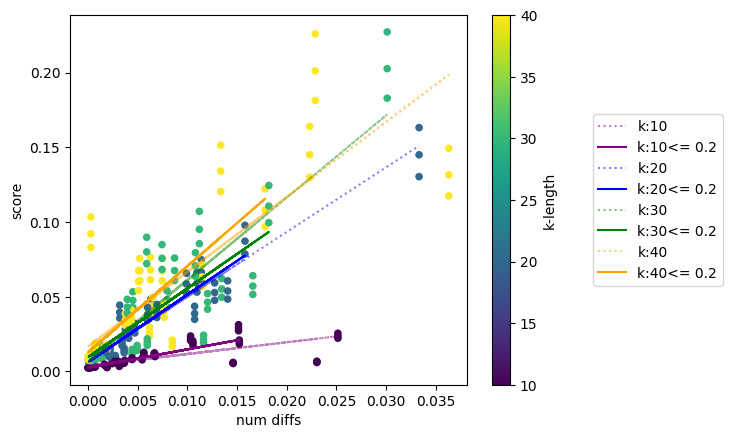

In [10]:
cov_40 = df_box3[df_box3["coverage"]==40]

# cov_10
fig, ax = plt.subplots()
cov_40.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_40[cov_40["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

In [11]:
klength_10 = df_box3[df_box3["k-length"]==10]
klength_10

,num diffs,coverage,k-length,score,hash
1,0.000619,10,10,0.012381,5
2,0.000619,10,10,0.011585,6
3,0.000619,10,10,0.010885,7
17,0.000566,15,10,0.008141,5
18,0.000566,15,10,0.007613,6
...,...,...,...,...,...
2734,0.007779,30,10,0.008982,6
2735,0.007779,30,10,0.008414,7
2749,0.015226,40,10,0.020983,5
2750,0.015226,40,10,0.019515,6


/tmp/ipykernel_659734/809449967.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_659734/809449967.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_659734/809449967.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Coeff: 10
[1.34237451]
Coeff: 15
[1.23332057]
Coeff: 20
[0.88704215]
Coeff: 30
[1.14828429]
Coeff: 40
[0.73217439]


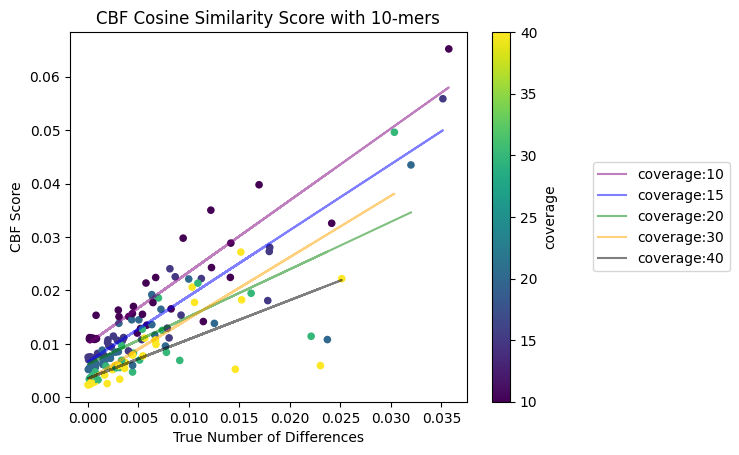

In [12]:
klength_10 = df_box3[df_box3["k-length"]==10]
klength_10 = klength_10[klength_10["hash"]==7]
# cov_10
fig, ax = plt.subplots()
klength_10.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,15,20,30,40]
color_1 = ["Purple","Blue","Green","Orange","Black"]
color_2 = ["Orange","Pink","Teal","Red","Black"]

for i in range(0,len(covs)):
    sub_df = klength_10[klength_10["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.title("CBF Cosine Similarity Score with 10-mers")
ax.set_ylabel("CBF Score")
ax.set_xlabel("True Number of Differences")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

In [13]:
klength_20 = df_box3[df_box3["k-length"]==20]
# klength_20 = klength_20[klength_20["hash"]==6]
klength_20

,num diffs,coverage,k-length,score,hash
5,0.000495,10,20,0.037792,5
6,0.000495,10,20,0.033817,6
7,0.000495,10,20,0.030589,7
21,0.000562,15,20,0.018878,5
22,0.000562,15,20,0.016862,6
...,...,...,...,...,...
2738,0.000467,30,20,0.011606,6
2739,0.000467,30,20,0.010474,7
2753,0.033308,40,20,0.163158,5
2754,0.033308,40,20,0.144963,6


/tmp/ipykernel_659734/1416622537.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_659734/1416622537.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_659734/1416622537.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Coeff: 10
[1.42961408]
Coeff: 20
[0.94647608]
Coeff: 30
[1.2259447]
Coeff: 40
[0.7832163]


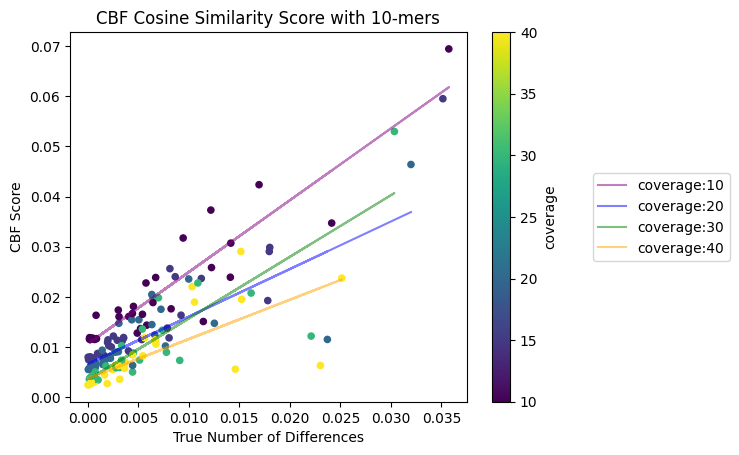

In [22]:
klength_20 = df_box3[df_box3["k-length"]==10]
klength_20 = klength_20[klength_20["hash"]==6]
# cov_10
fig, ax = plt.subplots()
klength_20.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_20[klength_20["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.title("CBF Cosine Similarity Score with 10-mers")
ax.set_ylabel("CBF Score")
ax.set_xlabel("True Number of Differences")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_659734/2961637801.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_659734/2961637801.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_659734/2961637801.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Coeff: 10
[6.59920438]
Coeff: 20
[5.47362753]
Coeff: 30
[3.22547632]
Coeff: 40
[5.46578868]


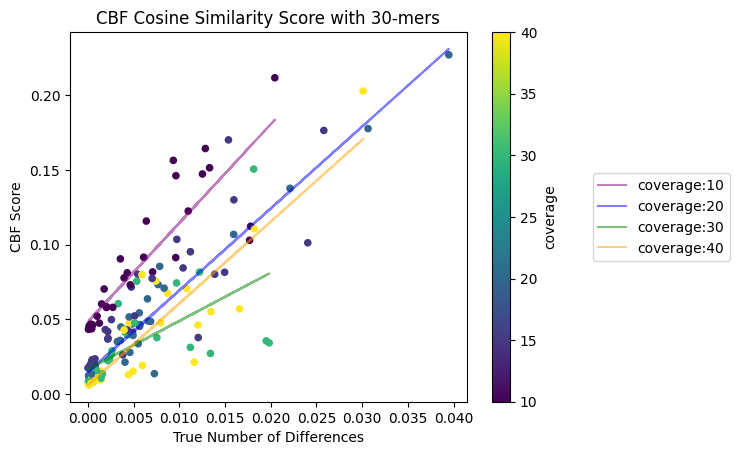

In [19]:
klength_30 = df_box3[df_box3["k-length"]==30]
klength_30 = klength_30[klength_30["hash"]==6]
# cov_10
fig, ax = plt.subplots()
klength_30.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_30[klength_30["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.title("CBF Cosine Similarity Score with 30-mers")
ax.set_ylabel("CBF Score")
ax.set_xlabel("True Number of Differences")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_659734/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_659734/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_659734/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Coeff: 10
[7.98689433]
Coeff: 20
[5.23000084]
Coeff: 30
[6.76471589]
Coeff: 40
[5.01830814]


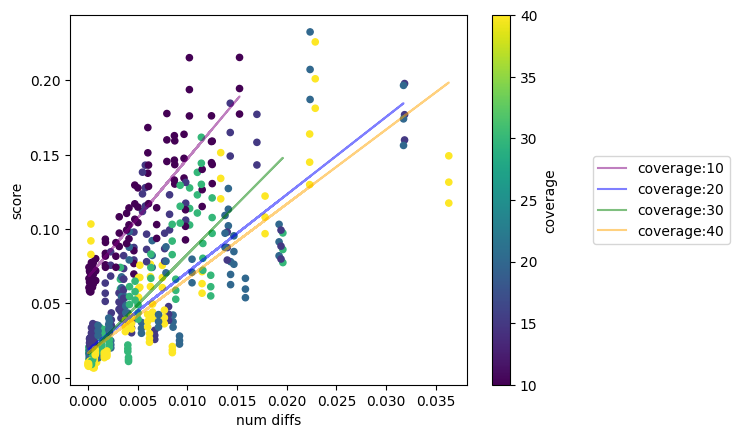

In [16]:
klength_40 = df_box3[df_box3["k-length"]==40]
# cov_10
fig, ax = plt.subplots()
klength_40.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_40[klength_40["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()